In [1]:
#Importing all the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train_news.csv')

In [3]:
#This is our data
df.head()

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [4]:
df.shape

(20800, 6)

In [5]:
#df["label"].replace({0: "fake", 1: "true"}, inplace=True)

In [6]:
#df.head()

In [7]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [8]:
df.head()

id                                           headline  \
0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [9]:
# Shuffle the data
#from sklearn.utils import shuffle
#df = shuffle(df)
#df = df.reset_index(drop=True)

In [10]:
# Check the data
#df.head()

In [11]:
# Removing the ID (we won't use it for the analysis)
df.drop(["id"],axis=1,inplace=True)
df.head()

headline  \
0  Ethics Questions Dogged Agriculture Nominee as...   
1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2  Cotton to House: ’Do Not Walk the Plank and Vo...   
3  Paul LePage, Besieged Maine Governor, Sends Co...   
4                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [12]:
# Removing the written_by (we won't use it for the analysis)
df.drop(["written_by"],axis=1,inplace=True)
df.head()

headline  \
0  Ethics Questions Dogged Agriculture Nominee as...   
1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2  Cotton to House: ’Do Not Walk the Plank and Vo...   
3  Paul LePage, Besieged Maine Governor, Sends Co...   
4                       A Digital 9/11 If Trump Wins   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [13]:
#Checking for null values
categorical_miss_val = round(100*(df.select_dtypes(include=object).isna().sum().\
sort_values(ascending=False)/len(df.index)),2)\
.to_frame().rename(columns={0:'Null values percentage'})[:10]
categorical_miss_val

Null values percentage
headline                    2.68
news                        0.19

As we see the percentage of null values in both the columns are very less, so I am going to drop those rows having any null values

In [14]:
#Dropping the rows having null values
df.dropna(inplace=True)

<AxesSubplot:>

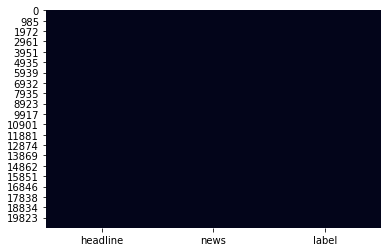

In [15]:
sns.heatmap(df.isnull(), cbar=False)

Now we can see we don't have any null values

In [16]:
# Convert to lowercase
df['news'] = df['news'].apply(lambda x: x.lower())
df.head()

headline  \
0  Ethics Questions Dogged Agriculture Nominee as...   
1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2  Cotton to House: ’Do Not Walk the Plank and Vo...   
3  Paul LePage, Besieged Maine Governor, Sends Co...   
4                       A Digital 9/11 If Trump Wins   

                                                news  label  
0  washington  —   in sonny perdue’s telling, geo...      0  
1  houston  —   venezuela had a plan. it was a ta...      0  
2  sunday on abc’s “this week,” while discussing ...      0  
3  augusta, me.  —   the beleaguered republican g...      0  
4    finian cunningham has written extensively on...      1

In [17]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['news'] = df['news'].apply(punctuation_removal)

In [18]:
# Check
df.head()

headline  \
0  Ethics Questions Dogged Agriculture Nominee as...   
1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2  Cotton to House: ’Do Not Walk the Plank and Vo...   
3  Paul LePage, Besieged Maine Governor, Sends Co...   
4                       A Digital 9/11 If Trump Wins   

                                                news  label  
0  washington  —   in sonny perdue’s telling geor...      0  
1  houston  —   venezuela had a plan it was a tac...      0  
2  sunday on abc’s “this week” while discussing t...      0  
3  augusta me  —   the beleaguered republican gov...      0  
4    finian cunningham has written extensively on...      1

In [19]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['news'] = df['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumo2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


label
0    10387
1     9816
Name: news, dtype: int64


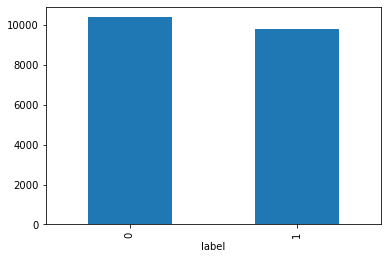

	
0: Fake 1: True


In [20]:
# How many fake and real articles?
print(df.groupby(['label'])['news'].count())
df.groupby(['label'])['news'].count().plot(kind="bar")
plt.show()
print('\t')
print('0: Fake', '1: True')

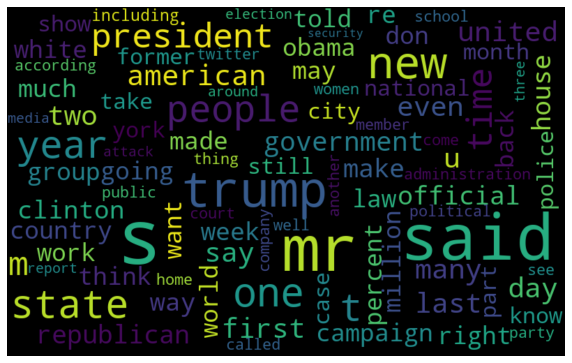

In [21]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = df[df["label"] == 0]
all_words = ' '.join([i for i in fake_data['news']])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False,max_words=90).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

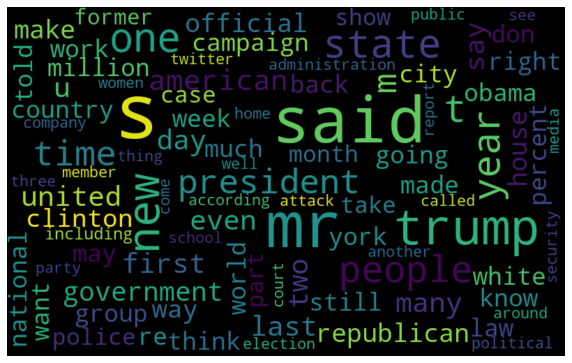

In [22]:
# Word cloud for true news
from wordcloud import WordCloud

real_data = df[df["label"] == 1]
All_words = ' '.join([i for i in real_data['news']])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False,max_words=90).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# Most frequent words counter
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()


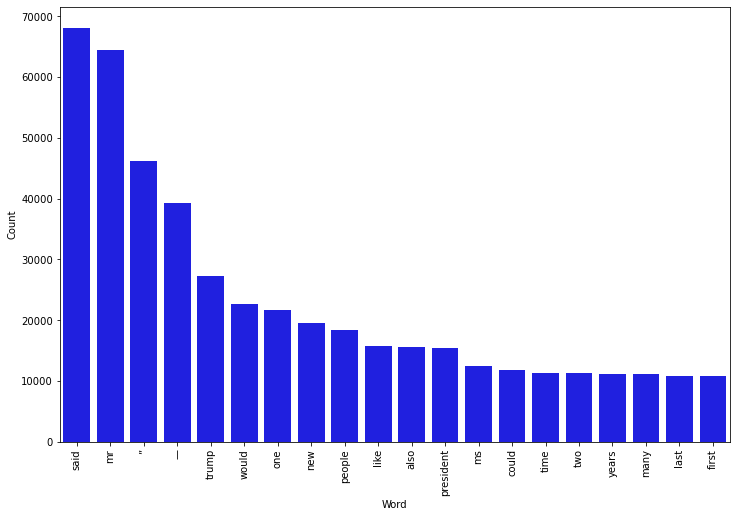

In [24]:

# Most frequent words in fake news
counter(df[df["label"] == 0], "news", 20)


In [25]:

# Most frequent words in true news
counter(df[df["label"] == 1], "news", 20)

In [26]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model Building

In [27]:

# Split the data
X_train,X_test,y_train,y_test = train_test_split(df['news'], df.label, test_size=0.2, random_state=42)


# Logistic Regression

In [28]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 95.25%


In [29]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Confusion matrix, without normalization


In [30]:
#Classification Report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2084
           1       0.95      0.95      0.95      1957

    accuracy                           0.95      4041
   macro avg       0.95      0.95      0.95      4041
weighted avg       0.95      0.95      0.95      4041



In [31]:
#Generating the ROC Curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, prediction)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, prediction))
print('\t')
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Logistic Gegression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

roc_auc_score for Logistic Regression:  0.9523621832939877
	


# Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction1 = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction1)*100,2)))

accuracy: 89.31%


In [33]:
#Classification Report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2084
           1       0.88      0.90      0.89      1957

    accuracy                           0.89      4041
   macro avg       0.89      0.89      0.89      4041
weighted avg       0.89      0.89      0.89      4041



In [34]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, prediction1)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Confusion matrix, without normalization


roc_auc_score for Decision Tree:  0.8932391915629411
	


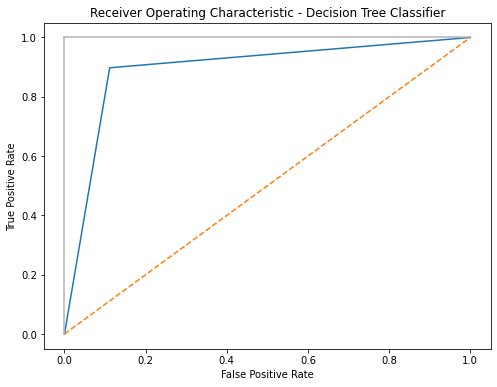

In [35]:
#Generating the ROC Curve
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, prediction1)
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, prediction1))
print('\t')
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Decision Tree Classifier')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction2 = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction2)*100,2)))

accuracy: 90.37%


In [37]:
#Classification Report
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2084
           1       0.93      0.86      0.90      1957

    accuracy                           0.90      4041
   macro avg       0.91      0.90      0.90      4041
weighted avg       0.91      0.90      0.90      4041



Confusion matrix, without normalization


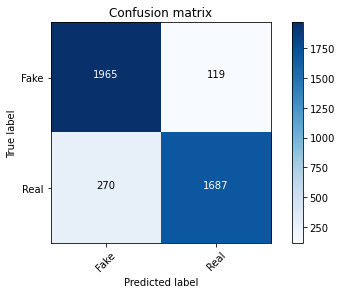

In [38]:
#Confusion matrix
cm = metrics.confusion_matrix(y_test, prediction2)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

roc_auc_score for Random Forest Classifier:  0.9024659988211029
	


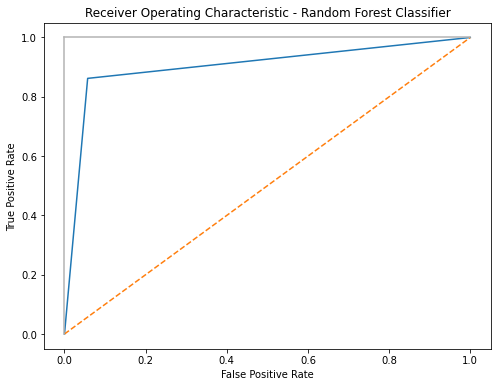

In [39]:
#Generating the ROC Curve
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, prediction2)
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, prediction2))
print('\t')
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Random Forest Classifier')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- From all the three model Logistic Regression was performing the best.
- Let's save the LR model

In [40]:
# Lets save the model having highest accuracy using joblib 
import joblib
joblib.dump(model,'LR_FakeNewsPrediction.pkl')

['LR_FakeNewsPrediction.pkl']